<a href="https://colab.research.google.com/github/ahorvath008/Data-Science/blob/main/US_Housing_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Purpose:**  This dataset contains house sale prices for King County, which includes Seattle. 

**Data:** It includes homes sold between May 2014 and May 2015.

Table of Contents

1. Data import and data wrangling
2. Data characteristics
3. Exploratory Data Analysis (EDA)
4. Model building and regression
5. Model testing and training
6. Data visualisations and graphs

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Load the datafile
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [32]:
#1. Data import and data wrangling
# Get a basic view of the data
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Get a basic view of the data
df.info()

In [ ]:
# Get a basic view of the data
df.describe()

In [ ]:
#Drop the columns "id" and "Unnamed: 0", which we will not use for the analysis
df.drop(["id"], axis=1, inplace=True)
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.describe()

In [ ]:
# Validate if there are missing data for the following key data fields: bedroom, bathroom, sq ft
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())
print("number of NaN values for the column sq. ft living space :", df['sqft_living'].isnull().sum())

In [ ]:
#We can replace the missing values of the bedroom and bathroom colums with the means of the columns. 
avg_bedroom=df['bedrooms'].mean()
df["bedrooms"].replace(np.nan, avg_bedroom, inplace=True)
avg_bathroom = df["bathrooms"].mean()
df["bathrooms"].replace(np.nan, avg_bathroom, inplace=True)

In [ ]:
#Validate that there are no null values
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

In [ ]:
#Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.
df["floors"].value_counts("").to_frame()

In [ ]:
# Exploratory Data Analysis (EDA)
# Identify which variables have the largest correlation with house prices
df.corr()['price'].sort_values()

In [ ]:
#4. Model building and regression.  Assess if the living space is a good predictor for the house price data
from sklearn.linear_model import LinearRegression 

X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

In [ ]:
z = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]] 

lm=LinearRegression()
lm.fit(z, df['price'])

yhat = lm.predict(z)
print(lm.intercept_)
print(lm.coef_)
lm.score(z,y)

In [56]:
#Pipeline object predictors
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]



In [ ]:
# 5. Model testing and training
from sklearn.model_selection import train_test_split



In [ ]:
# We will split the data into training and testing sets:

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])



In [ ]:
#Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. 
from sklearn.linear_model import Ridge

#Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.


Text(0.5, 1.0, 'Prices per floors')

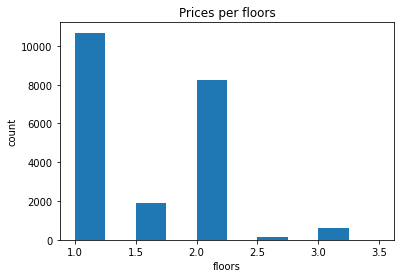

In [31]:
#6. Data visualisations and graphs
# Graph out critical data and set x/y labels.  This indicates most houses in the dataset tend to have eithe 1 or 2 floors. 
plt.hist(df["floors"])
plt.xlabel("floors")
plt.ylabel("count")
plt.title("Distribution of houses per number of floors")

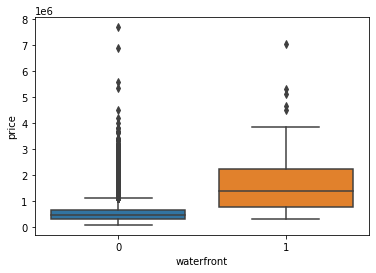

In [33]:
#Check whether houses with/without waterfront view have more price outliers.
sns.boxplot(x="waterfront", y="price", data=df)

Text(0, 0.5, 'Price')

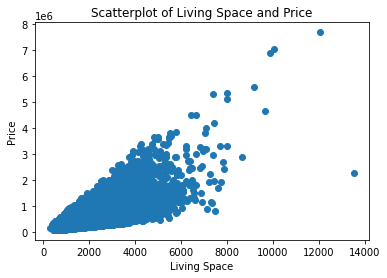

In [36]:
# Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.
y = df["price"]
x = df["sqft_living"]
plt.scatter(x,y)

plt.title("Scatterplot of Living Space and Price")
plt.xlabel("Living Space")
plt.ylabel("Price")


Text(0, 0.5, 'Price')

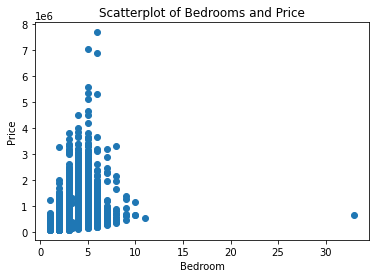

In [37]:
# Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.
y = df["price"]
x = df["bedrooms"]
plt.scatter(x,y)

plt.title("Scatterplot of Bedrooms and Price")
plt.xlabel("Bedroom")
plt.ylabel("Price")


Text(0, 0.5, 'Price')

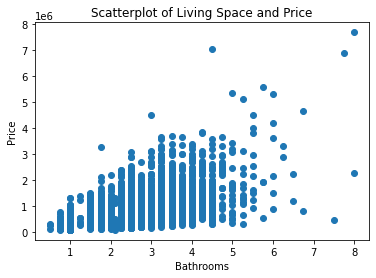

In [38]:
# Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.
y = df["price"]
x = df["bathrooms"]
plt.scatter(x,y)

plt.title("Scatterplot of Living Space and Price")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
